In [259]:
%pip install matplotlib
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [260]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime
# Ignore warning messages
warnings.filterwarnings('ignore')

In [261]:
car_details = pd.read_csv("CAR DETAILS.csv")
print(type(car_details))
car_details.head(5)

<class 'pandas.core.frame.DataFrame'>


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [262]:
car_details.shape

(4340, 8)

In [263]:
car_details.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [264]:
duplicate = car_details.duplicated()
duplicate.sum()


763

In [265]:
car_details.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [266]:
df=car_details.copy()

In [267]:
car_details.drop_duplicates(inplace=True)
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [268]:
car_details.shape

(3577, 8)

 Feature engineering

In [269]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [270]:
car_details.drop(['name'],axis=1,inplace=True)

In [271]:
null_values = car_details.isnull().sum()
null_values

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [272]:
car_details.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [273]:
car_details['transmission']

0       Manual
1       Manual
2       Manual
3       Manual
4       Manual
         ...  
4335    Manual
4336    Manual
4337    Manual
4338    Manual
4339    Manual
Name: transmission, Length: 3577, dtype: object

 Data Preprocessing


In [274]:
from sklearn.impute import SimpleImputer




In [275]:
# Perform imputation for numerical features
imputer = SimpleImputer(strategy='median')
car_details['km_driven'] = imputer.fit_transform(car_details[['km_driven']])

In [276]:
# Perform imputation for categorical features
imputer = SimpleImputer(strategy='most_frequent')
car_details[['fuel', 'seller_type', 'transmission', 'owner']] = imputer.fit_transform(car_details[['fuel', 'seller_type', 'transmission', 'owner']])

In [277]:
car_details.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000.0,Petrol,Individual,Manual,First Owner
1,2007,135000,50000.0,Petrol,Individual,Manual,First Owner
2,2012,600000,100000.0,Diesel,Individual,Manual,First Owner
3,2017,250000,46000.0,Petrol,Individual,Manual,First Owner
4,2014,450000,141000.0,Diesel,Individual,Manual,Second Owner


In [278]:
car_details.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000.0,Petrol,Individual,Manual,First Owner
1,2007,135000,50000.0,Petrol,Individual,Manual,First Owner
2,2012,600000,100000.0,Diesel,Individual,Manual,First Owner
3,2017,250000,46000.0,Petrol,Individual,Manual,First Owner
4,2014,450000,141000.0,Diesel,Individual,Manual,Second Owner


In [279]:
# One-hot encoding for categorical features
car_encoded = pd.get_dummies(car_details, drop_first=True)

In [280]:
car_encoded

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000.0,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000.0,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000.0,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000.0,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000.0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000.0,1,0,0,0,1,0,1,0,1,0,0
4336,2014,409999,80000.0,1,0,0,0,1,0,1,0,1,0,0
4337,2009,110000,83000.0,0,0,0,1,1,0,1,0,1,0,0
4338,2016,865000,90000.0,1,0,0,0,1,0,1,0,0,0,0


In [281]:
car_encoded

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000.0,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000.0,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000.0,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000.0,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000.0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000.0,1,0,0,0,1,0,1,0,1,0,0
4336,2014,409999,80000.0,1,0,0,0,1,0,1,0,1,0,0
4337,2009,110000,83000.0,0,0,0,1,1,0,1,0,1,0,0
4338,2016,865000,90000.0,1,0,0,0,1,0,1,0,0,0,0


In [282]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [283]:
# Scaling the numerical features
scaler = StandardScaler()
car_encoded[['year', 'km_driven']] = scaler.fit_transform(car_encoded[['year', 'km_driven']])
car_encoded

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-1.402566,60000,0.015754,0,0,0,1,1,0,1,0,0,0,0
1,-1.402566,135000,-0.404650,0,0,0,1,1,0,1,0,0,0,0
2,-0.226418,600000,0.646360,1,0,0,0,1,0,1,0,0,0,0
3,0.949731,250000,-0.488731,0,0,0,1,1,0,1,0,0,0,0
4,0.244042,450000,1.508188,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0.244042,409999,0.225956,1,0,0,0,1,0,1,0,1,0,0
4336,0.244042,409999,0.225956,1,0,0,0,1,0,1,0,1,0,0
4337,-0.932107,110000,0.289016,0,0,0,1,1,0,1,0,1,0,0
4338,0.714501,865000,0.436158,1,0,0,0,1,0,1,0,0,0,0


Exploratory Data Analysis

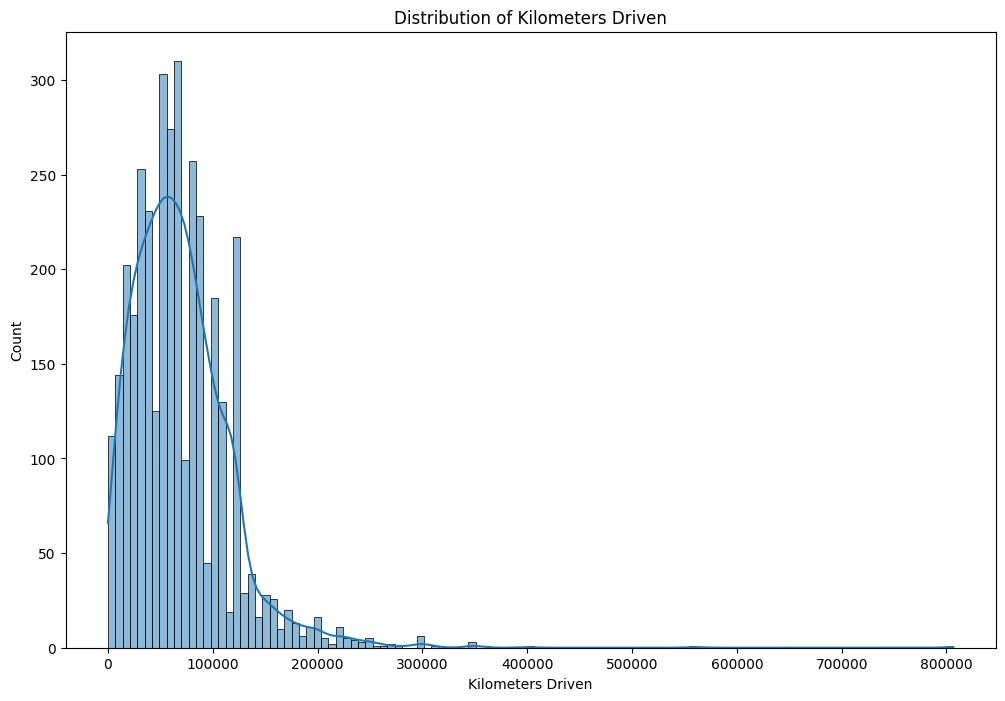

In [284]:
plt.figure(figsize=(12, 8))
sns.histplot(car_details['km_driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Count')
plt.show()


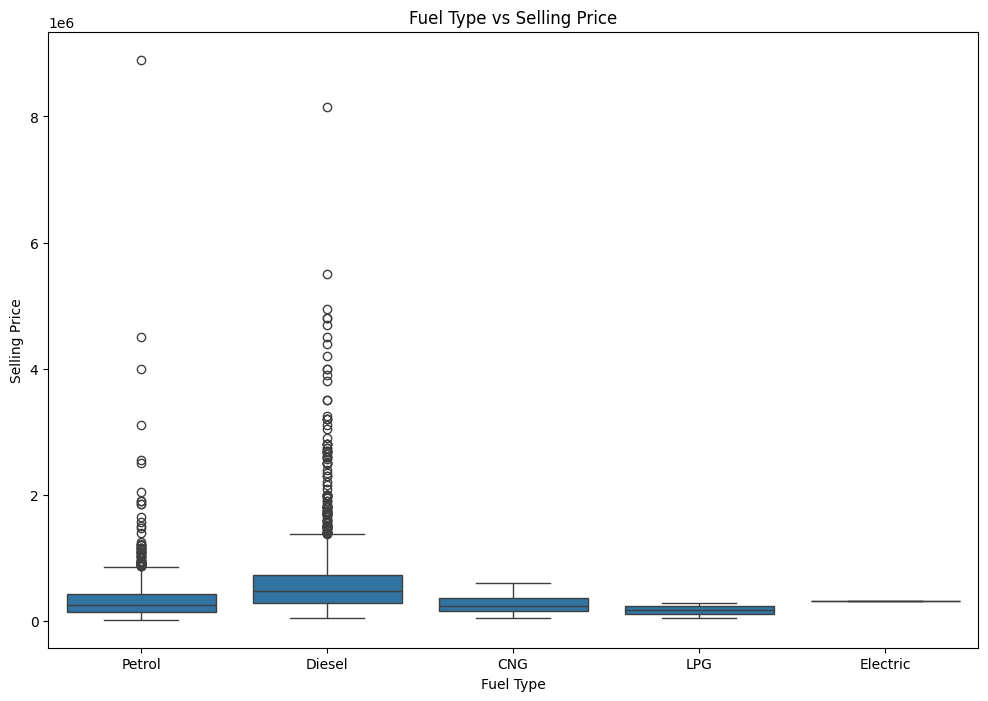

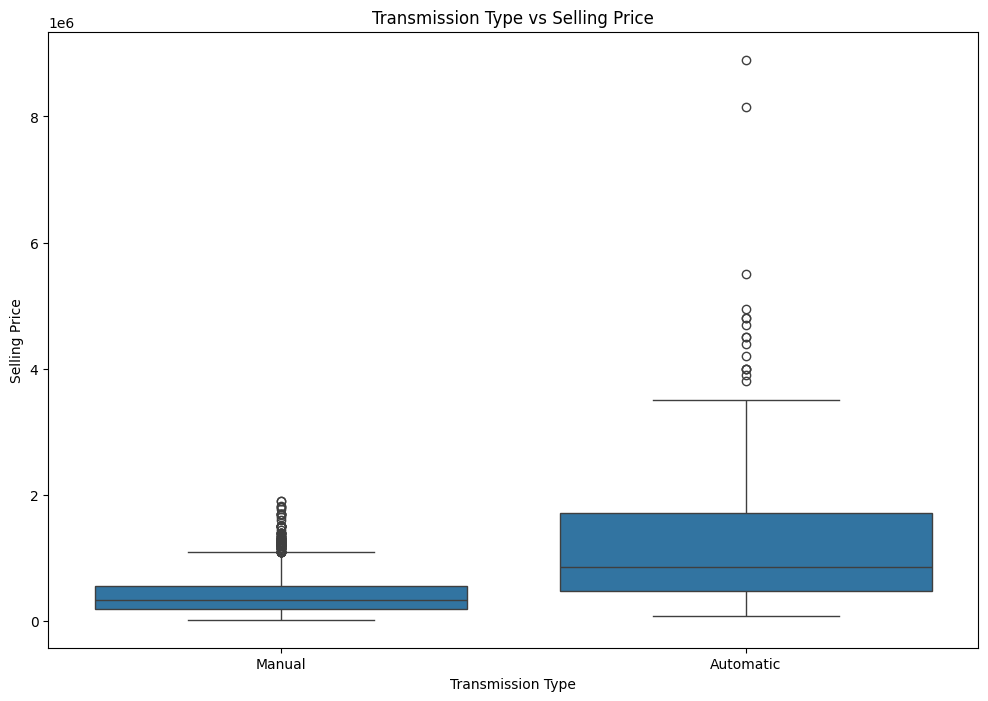

In [285]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['fuel'], y=car_details['selling_price'])
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x=car_details['transmission'], y=car_details['selling_price'])
plt.title('Transmission Type vs Selling Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

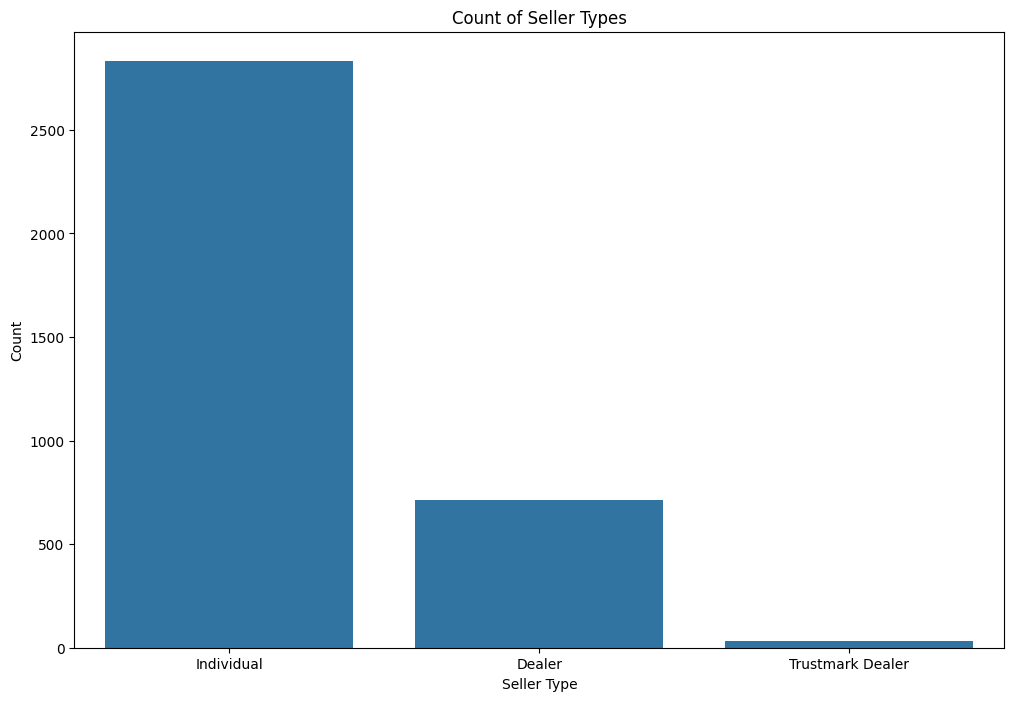

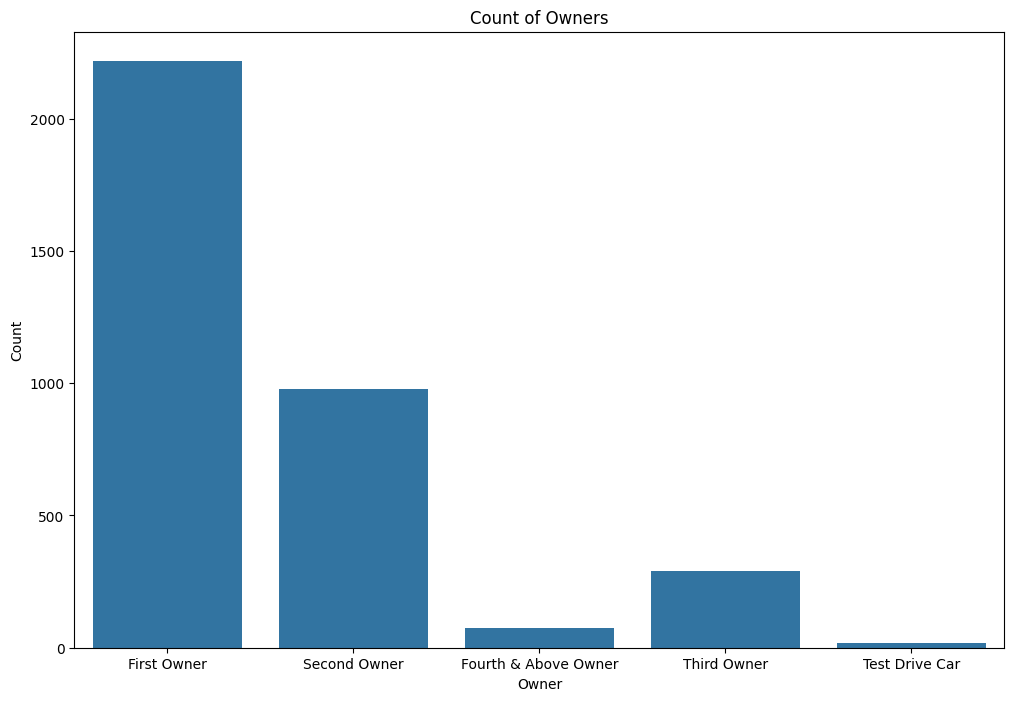

In [286]:
plt.figure(figsize=(12, 8))
sns.countplot(x=car_details['seller_type'])
plt.title('Count of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x=car_details['owner'])
plt.title('Count of Owners')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.show()

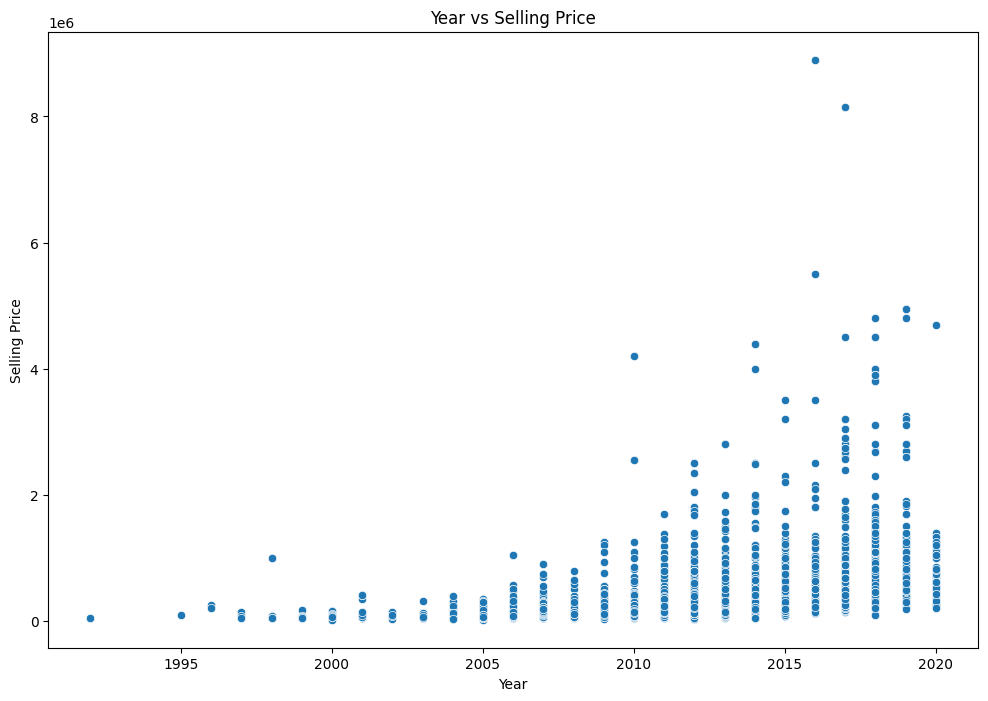

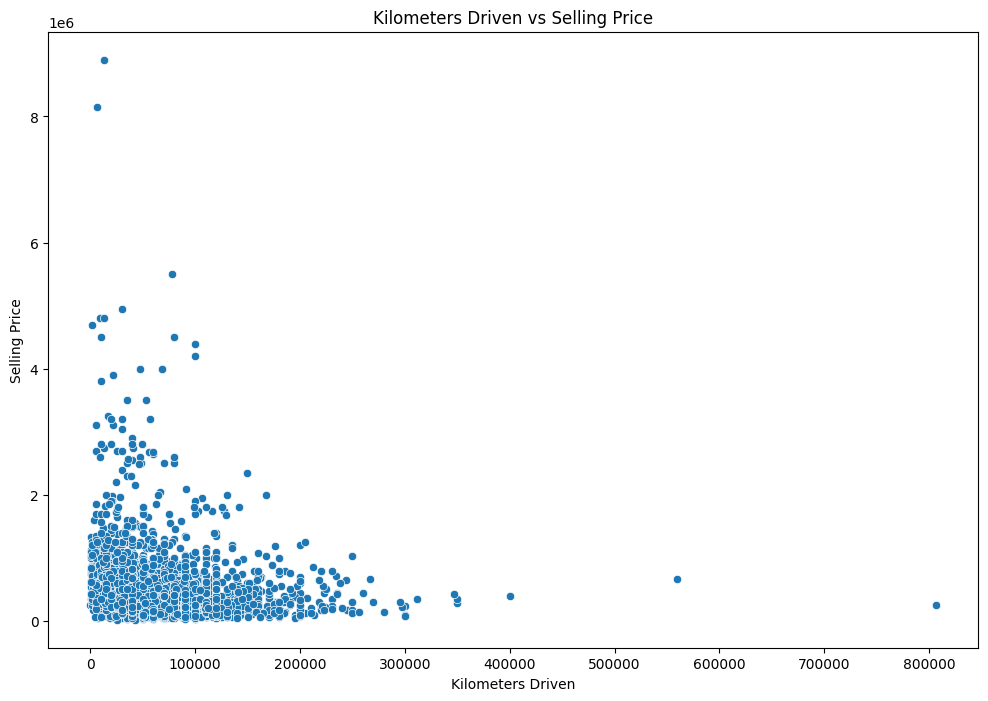

In [287]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['year'], y=df['selling_price'])
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x=car_details['km_driven'], y=car_details['selling_price'])
plt.title('Kilometers Driven vs Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

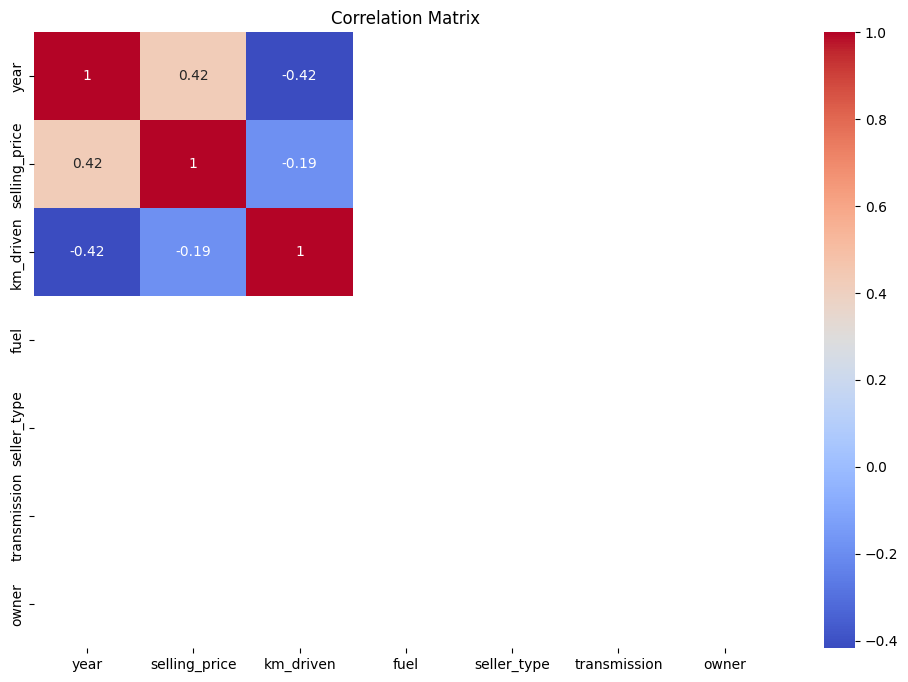

In [288]:
# Convert non-numeric columns to numeric if possible
car_details_numeric = car_details.apply(pd.to_numeric, errors='coerce')

# Check for NaN values and handle them
car_details_numeric.fillna(0, inplace=True)  # You can choose a different strategy for handling NaN values if necessary

# Correlation matrix
correlation_matrix = car_details_numeric.corr()
correlation_matrix



plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [289]:
from sklearn.model_selection import train_test_split


In [290]:
# Split the data into features and target
x = car_encoded.drop('selling_price', axis=1)
y = car_encoded['selling_price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2861, 13)
(716, 13)
(2861,)
(716,)


In [291]:
print(x.head())
print(y.head())

       year  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0 -1.402566   0.015754            0              0         0            1   
1 -1.402566  -0.404650            0              0         0            1   
2 -0.226418   0.646360            1              0         0            0   
3  0.949731  -0.488731            0              0         0            1   
4  0.244042   1.508188            1              0         0            0   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                       1                             0                    1   
1                       1                             0                    1   
2                       1                             0                    1   
3                       1                             0                    1   
4                       1                             0                    1   

   owner_Fourth & Above Owner  owner_Second Owner  owner

In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [293]:
a = {'Model':[],'r2 score':[],'MSE':[],'RMSE':[],'MAE':[]}

def evaluate(model,model_name,x_test,y_test,ypred):
    mse = mean_squared_error(y_test, ypred)
    r2 = r2_score(y_test, ypred)
    mae = mean_absolute_error(y_test, ypred)
    rmse = mean_squared_error(y_test, ypred,squared=False)
    print('mean squared error',mse)
    print('r2 score',r2)
    print('mean absolute error',mae)
    print('root mean squared error',rmse)
    a['Model'].append(model_name)
    a['r2 score'].append(r2)
    a['MSE'].append(mse)
    a['RMSE'].append(rmse)
    a['MAE'].append(mae)

def m_score(model):
    print('Training Score',model.score(x_train,y_train))   # Trainig Accuracy
    print('Testing Score',model.score(x_test,y_test))      # Testing Accuracy

Applying Linear Regression

In [294]:
# Building the linreg model
linreg = LinearRegression()
# Fit the model on the training data
linreg.fit(x_train, y_train)

LinearRegression()

In [295]:
# Computing Training and testing score
m_score(linreg)

Training Score 0.44013027703629104
Testing Score 0.41487759825200665


In [296]:
# Make predictions on the test set
ypred_linreg = linreg.predict(x_test)
print(ypred_linreg)

[ 4.47957058e+05  6.35669407e+05  1.12972481e+06  7.34126480e+05
  4.94696154e+05  1.96177891e+05  4.98798785e+05  4.64596410e+05
  6.35589849e+05  4.43683129e+05  4.26845801e+05  3.09176508e+05
  8.76647717e+04  4.83254960e+05  4.09638403e+05  5.43346866e+05
  3.99228475e+05  1.32466865e+06  4.28358763e+05  5.23748570e+05
 -1.24857022e+05  4.65630090e+05 -2.46235956e+04  5.05028210e+05
  1.81211651e+05  4.13347826e+05  3.69284475e+05 -1.24737436e+05
  4.62483266e+05  1.46801409e+06  4.12060480e+05  1.45985580e+06
  3.32968955e+05  6.80300007e+05  4.61755927e+05  5.04680088e+05
  3.65652923e+05  2.83270915e+05  5.57873073e+05  5.19554418e+05
  4.07444319e+05  1.43807418e+06  4.87419401e+05  6.45999777e+05
  1.67785999e+05  4.82754170e+05  2.90101965e+05  4.17525117e+05
  1.24690540e+05  4.64596410e+05  7.30494928e+05  6.13602869e+05
  4.08622394e+05  7.81821384e+05  6.26323609e+05  4.25511719e+05
  1.15010944e+06  4.97765106e+05  5.58507869e+05  3.06578635e+05
  1.46863732e+06  3.41317

In [297]:
# Evaluate the model
evaluate(linreg,'Lin_Reg',x_test,y_test,ypred_linreg)

mean squared error 148391300721.7298
r2 score 0.41487759825200665
mean absolute error 218054.82789710414
root mean squared error 385215.9144190824


 Lasso regression

In [298]:
%pip install Lasso

In [299]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [300]:
las = Lasso()
# Fit the model on the training data
las.fit(x_train,y_train)


Lasso()

In [301]:
# Make predictions on the test set
ypred_las = las.predict(x_test)

In [302]:
# Computing Training and testing score
m_score(las)


Training Score 0.4401302719538128
Testing Score 0.4148768375883155


In [303]:
# Evaluate the model
evaluate(las,'Lasso_Reg',x_test,y_test,ypred_las)

mean squared error 148391493631.57944
r2 score 0.4148768375883155
mean absolute error 218054.88624060212
root mean squared error 385216.16481084935


Ridge regression

In [304]:
rid = Ridge()
# Fit the model on the training data
rid.fit(x_train,y_train)

Ridge()

In [305]:
# Make predictions on the test set
ypred_rid = rid.predict(x_test)

In [306]:
# Computing Training and testing score
m_score(rid)

Training Score 0.44012072138629177
Testing Score 0.41483643135579773


In [307]:
evaluate(rid,'Ridge_Reg',x_test,y_test,ypred_rid)

mean squared error 148401740946.29968
r2 score 0.41483643135579773
mean absolute error 218025.2868734464
root mean squared error 385229.4653142458


Summary of regression models

In [308]:
sum = pd.DataFrame(a)
sum

,Model,r2 score,MSE,RMSE,MAE
0,Lin_Reg,0.414878,1.483913e+11,385215.914419,218054.827897
1,Lasso_Reg,0.414877,1.483915e+11,385216.164811,218054.886241
2,Ridge_Reg,0.414836,1.484017e+11,385229.465314,218025.286873


Applying Decision Tree Regressor

In [309]:
# Create and train a decision tree classifier
dt_Regressor = DecisionTreeRegressor()
# Fit the model on the training data
dt_Regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [310]:
# Make predictions on the test set
ypred_tree = dt_Regressor.predict(x_test)

In [311]:
evaluate(dt_Regressor,'Decision Tree',x_test,y_test,ypred_tree)

mean squared error 261428331322.37317
r2 score -0.030839222813802136
mean absolute error 241467.10229016017
root mean squared error 511300.62714842544


In [312]:
m_score(dt_Regressor)

Training Score 0.9487734265151704
Testing Score -0.030839222813802136


KNN Regressor

In [313]:
knn_Regressor = KNeighborsRegressor()
# Fit the model on the training data
knn_Regressor.fit(x_train, y_train)

# Make predictions on the test set
knn_pred = knn_Regressor.predict(x_test)

In [314]:
evaluate(knn_Regressor,'KNN',x_test,y_test,knn_pred)

mean squared error 147222142173.0229
r2 score 0.4194877125559876
mean absolute error 194470.06871508382
root mean squared error 383695.376793913


In [315]:
m_score(knn_Regressor)

Training Score 0.6562267479798934
Testing Score 0.4194877125559876


Support vector Machine

In [316]:
svm_Regressor = SVR()
# Fit the model on the training data
svm_Regressor.fit(x_train, y_train)

# Make predictions on the test set
svm_pred = svm_Regressor.predict(x_test)

In [317]:
evaluate(svm_Regressor,'SVM',x_test,y_test,svm_pred)

mean squared error 269765839745.97684
r2 score -0.06371488957921057
mean absolute error 277616.51356186287
root mean squared error 519389.87258703535


In [318]:
m_score(svm_Regressor)

Training Score -0.057739164952447686
Testing Score -0.06371488957921057


Random forest

In [319]:
# Building the RF Model
rf = RandomForestRegressor(n_estimators=80,min_samples_split=50,max_depth=8)
# Fit the model on the training data
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_split=50, n_estimators=80)

In [320]:
ypred_rf=rf.predict(x_test)

In [321]:
evaluate(rf,'Random Forest',x_test,y_test,ypred_rf)

mean squared error 120462005885.53125
r2 score 0.5250057256705384
mean absolute error 183255.02298901498
root mean squared error 347076.36895290244


In [322]:
m_score(rf)

Training Score 0.576301111556905
Testing Score 0.5250057256705384


Comparing different Classification Models

In [323]:
Model_performance = pd.DataFrame(a)
Model_performance

,Model,r2 score,MSE,RMSE,MAE
0,Lin_Reg,0.414878,1.483913e+11,385215.914419,218054.827897
1,Lasso_Reg,0.414877,1.483915e+11,385216.164811,218054.886241
2,Ridge_Reg,0.414836,1.484017e+11,385229.465314,218025.286873
3,Decision Tree,-0.030839,2.614283e+11,511300.627148,241467.102290
4,KNN,0.419488,1.472221e+11,383695.376794,194470.068715
5,SVM,-0.063715,2.697658e+11,519389.872587,277616.513562
6,Random Forest,0.525006,1.204620e+11,347076.368953,183255.022989


In [324]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(2861, 13)
(716, 13)
(3577, 13)
(3577,)


In [325]:
# Building the RF Model
Bestmodel = RandomForestRegressor(n_estimators=80,min_samples_split=50,max_depth=8)
# Fit the model on the Actual data
Bestmodel.fit(x,y)


RandomForestRegressor(max_depth=8, min_samples_split=50, n_estimators=80)

In [326]:
car_encoded.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-1.402566,60000,0.015754,0,0,0,1,1,0,1,0,0,0,0
1,-1.402566,135000,-0.404650,0,0,0,1,1,0,1,0,0,0,0
2,-0.226418,600000,0.646360,1,0,0,0,1,0,1,0,0,0,0
3,0.949731,250000,-0.488731,0,0,0,1,1,0,1,0,0,0,0
4,0.244042,450000,1.508188,1,0,0,0,1,0,1,0,1,0,0


In [327]:
#Predict on New Data
#Create a new dataset with 20 random data points from the car details dataset
new_data = car_encoded.sample(n=20, random_state=2023)
new_data.shape

(20, 14)

In [328]:
new_data['selling_price'].value_counts()

349000    1
325000    1
150000    1
725000    1
500000    1
520000    1
190000    1
170000    1
70000     1
300000    1
470000    1
250999    1
700000    1
430000    1
110000    1
200000    1
340000    1
950000    1
345000    1
480000    1
Name: selling_price, dtype: int64

In [329]:
new_data.to_csv('sample_major.csv')

In [330]:
# Assuming the saved model is loaded as 'model'
X_test = new_data.drop("selling_price", axis=1)  # Assuming "selling_price" is the target variable
Y_test = new_data["selling_price"]

Saving and Loading the Best Model:

In [331]:
import joblib
# Save the best model
joblib.dump(Bestmodel, 'best_model.joblib')
# Load the model
loaded_model = joblib.load('best_model.joblib')

In [332]:
# Make predictions using the loaded model
predictions = loaded_model.predict(X_test)

In [333]:
print('Predictions:', predictions)

Predictions: [352556.9964161  524720.01162649 659143.42063758 895214.1017734
 418742.33237173 201457.80504902 367384.01518603 375373.93870466
 673917.49214755 379163.33491468 353894.62613203 323510.45052771
 102346.66936484 287845.84823074 354732.62926675 506055.2347204
 415304.94619679 815232.41546927 396064.86421438 554654.52489945]


In [334]:
results = pd.DataFrame({"Actual Selling Price": Y_test, "Predicted Selling Price": predictions})
print(results)

      Actual Selling Price  Predicted Selling Price
2003                349000            352556.996416
1395                325000            524720.011626
2085                345000            659143.420638
4139                950000            895214.101773
1063                340000            418742.332372
1918                200000            201457.805049
658                 110000            367384.015186
2164                430000            375373.938705
1817                700000            673917.492148
2027                250999            379163.334915
2631                470000            353894.626132
243                 300000            323510.450528
2287                 70000            102346.669365
1226                170000            287845.848231
1266                190000            354732.629267
1099                520000            506055.234720
1486                500000            415304.946197
1148                725000            815232.415469
812         